<a href="https://colab.research.google.com/github/OsbenVizcarra/IA-Fundamentals/blob/main/Pr%C3%A1ctica_N%C2%B0_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica N° 03**

En sus respectivos grupos, desarrollar los siguientes experimentos (usted deberá generar las ciudades de forma aleatoria).

*   **Experimento 1:**
Para un mismo conjunto de 100 ciudades, implementar y comparar la solución obtenida usando los métodos de selección: Roulette wheel selection, Rank-based selection, Fitness scaling y Tournament selection.

*   **Experimento 2:**  
Para un mismo conjunto de 100 ciudades, implementar y comparar la solución obtenida usando los métodos inicialización de población: random, heuristic y hybrid initialization.

Usted es libre de escoger los demás hiper parámetros, pero asegurese de que sean los mismos para cada experimento. Por ejemplo, para el experimento 1, usted deberá guardar el fitness cada cierto número de generaciones y luego deberá generar un grafico similar a la Figura 1. En ese gráfico se ve como cada método de selección afecta la busca de soluciones durante la ejecución del algoritmo genético (considere que los datos utilizados en dicho gráfico son ficticios). Luego, deberá mostrar en una tabla la solución y el fitness obtenido por cada método de selección. Finalmente, deberá mostrar la solución dibujada por cada método de manera similar a como se desarrollo en clases. Deberá realizar lo mismo para el experimento 2.



In [11]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import random


def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    #plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# **Population Initialization**



In [12]:
#Genera una ruta inicial usando la heurística de vecino más cercano
def nearest_neighbor(num_cities, distances):
    route = []
    visited = set()

    # Selecciona una ciudad inicial al azar
    current_city = np.random.randint(0, num_cities)
    route.append(current_city)
    visited.add(current_city)

    while len(visited) < num_cities:
        # Encuentra la ciudad no visitada más cercana
        nearest_city = None
        min_distance = float('inf')  # min_distance se inicializa con el valor infinito positivo
        for city in range(num_cities):
            if city not in visited and distances[current_city][city] < min_distance:
                nearest_city = city
                min_distance = distances[current_city][city]

        # Añade la ciudad más cercana a la ruta
        route.append(nearest_city)
        visited.add(nearest_city)
        current_city = nearest_city

    return route

# Crea una población inicial
def create_initial_population(pop_size, N, distances):
    population = []
    while len(population) < pop_size:
        for _ in range(pop_size):
          individual = nearest_neighbor(N, distances)
          population.append(individual)
    return population

# **Initialization without duplicated individuals**

In [14]:
# Crear población inicial
def create_initial_population(pop_size, num_cities):
    population = set() # asegurar que la población no contenga ciudades repetidas
    while len(population) < pop_size:
        individual = tuple(np.random.permutation(num_cities))
        population.add(individual)
    return [list(ind) for ind in population]

# **Hybrid Initialization**

In [15]:
# Crear población inicial híbrida
def create_hybrid_population(pop_size, num_cities, distances):
    population = set()

    # Crear una parte de la población usando heurística (Nearest Neighbor)
    heuristic_size = int(0.4 * pop_size)  # 40% de la población
    for _ in range(heuristic_size):
        individual = nearest_neighbor(num_cities, distances)
        population.add(tuple(individual))

    # Crear el resto de la población de manera aleatoria
    random_size = pop_size - heuristic_size
    while len(population) < pop_size:
        individual = tuple(np.random.permutation(num_cities))  # Generar un individuo aleatorio
        population.add(individual)  # Agregar como tupla para evitar duplicados

    # Convertir las tuplas de vuelta a listas antes de devolver
    return [list(ind) for ind in population]

# **Fitness**

In [29]:
def fitness(solution): # distancia mínima
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance

# **Selection**

In [18]:
def roulete_wheel_selection_minimization(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

In [19]:
def tournament_selection(population, fitness_values, k=4):
    """
    Selección por torneo.
    :param population: Lista de individuos.
    :param fitness_values: Lista de fitness correspondientes.
    :param k: Tamaño del torneo.
    :return: Individuo seleccionado.
    """


    # Seleccionar k individuos al azar
    tournament_indices = random.sample(range(len(population)), k)
    tournament_individuals = [population[i] for i in tournament_indices]
    tournament_fitness = [fitness_values[i] for i in tournament_indices]

    # Seleccionar el individuo con mejor fitness en el torneo
    best_index = tournament_indices[np.argmin(tournament_fitness)]
    return population[best_index]

In [20]:
def rank_selection(population, fitness_values):
    # Ordenar la población por fitness
    sorted_indices = np.argsort(fitness_values)  # Índices de menor a mayor fitness
    sorted_population = [population[i] for i in sorted_indices]
    sorted_fitness = [fitness_values[i] for i in sorted_indices]

    # Asignar rangos (1 para el peor, n para el mejor)
    num_individuals = len(population)
    ranks = list(range(num_individuals, 0, -1 ))  # [n,n-1,n-2, ...,1]

    # Calcular probabilidades de selección basadas en el rango
    total_ranks = sum(ranks)
    selection_probs = [rank / total_ranks for rank in ranks]  # Probabilidades proporcionales al rango

    # Seleccionar un individuo utilizando ruleta
    selected_index = np.random.choice(len(sorted_population), p=selection_probs)
    return sorted_population[selected_index]

# **Crossover**

In [22]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [-1]*size, [-1]*size # crea los hijos llenos de -1 al principio

    start, end = sorted(random.sample(range(size), 2))
    child1[start:end+1] = parent2[start:end+1]
    child2[start:end+1] = parent1[start:end+1]

    fill_child(child1, parent1, end)
    fill_child(child2, parent2, end)

    return child1, child2


# **Mutation**

In [23]:
def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual


# **Selection Elite**

In [24]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el menor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices

# **Integration - 1st Experiment**

In [25]:
# hyperparametros
pop_size = 150
N = 100
elite_size = 20
mutation_rate = 0.001
generations = 2000

#pop_size = 300
#N = 100
#elite_size = 50
#mutation_rate = 0.01
#generations = 10_000

In [26]:
#Ciudades y distancias
cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))

print(cities)
print(distances)

[[0.49025368 0.55957838]
 [0.44501193 0.71054843]
 [0.03134697 0.86281799]
 [0.9897456  0.18693766]
 [0.77157372 0.05666298]
 [0.55540378 0.21359773]
 [0.68815271 0.90918292]
 [0.85964892 0.81220228]
 [0.27956019 0.9367506 ]
 [0.11996644 0.855438  ]
 [0.7697579  0.37548626]
 [0.05975216 0.67733229]
 [0.90805101 0.03937075]
 [0.03654768 0.15545328]
 [0.46450836 0.92990915]
 [0.67228333 0.38494095]
 [0.20686495 0.86258124]
 [0.39217037 0.29026513]
 [0.87034711 0.54427727]
 [0.2153765  0.86680368]
 [0.39903899 0.06175301]
 [0.85132609 0.96790005]
 [0.00938217 0.55126786]
 [0.27554741 0.37240886]
 [0.46084979 0.08247725]
 [0.89196852 0.18820163]
 [0.87042465 0.25198816]
 [0.52519397 0.84547775]
 [0.89235022 0.73403057]
 [0.55067101 0.02088644]
 [0.09310983 0.45002449]
 [0.9542695  0.83616515]
 [0.34877303 0.70208558]
 [0.50338813 0.38857466]
 [0.64938598 0.17430423]
 [0.65630742 0.10396022]
 [0.17383362 0.34624826]
 [0.47978804 0.95246516]
 [0.21851863 0.34565319]
 [0.5062078  0.15318982]


# **Roulette wheel selection**

Generation 0 | Best distance: 43.79554190300839
Generation 50 | Best distance: 31.57161055827261
Generation 100 | Best distance: 25.401130928319173
Generation 150 | Best distance: 21.81913485406244
Generation 200 | Best distance: 20.23093616326245
Generation 250 | Best distance: 19.00282744834204
Generation 300 | Best distance: 18.57092764665936
Generation 350 | Best distance: 17.99551564806205
Generation 400 | Best distance: 17.05170931115688
Generation 450 | Best distance: 16.784954087638287
Generation 500 | Best distance: 16.311599684003674
Generation 550 | Best distance: 16.133502985607805
Generation 600 | Best distance: 15.644631642973776
Generation 650 | Best distance: 15.320495747504674
Generation 700 | Best distance: 14.892434305691468
Generation 750 | Best distance: 14.627259762506753
Generation 800 | Best distance: 14.13689041668121
Generation 850 | Best distance: 13.958156559164594
Generation 900 | Best distance: 13.826203926588894
Generation 950 | Best distance: 13.61288425

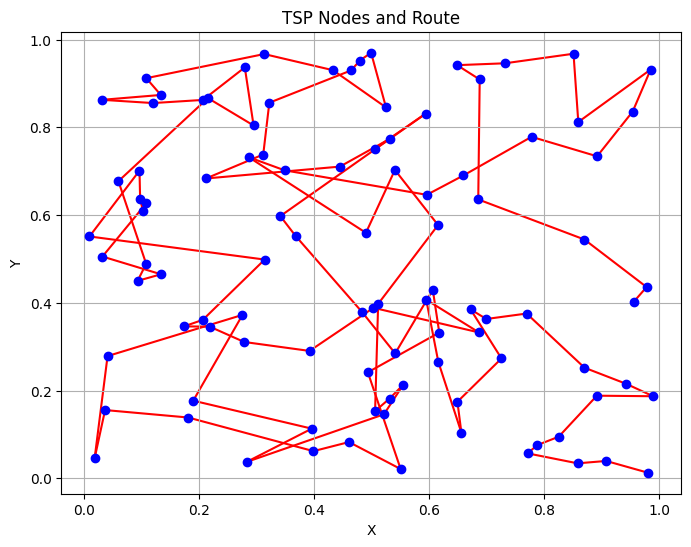

In [30]:
history_roulette = []

# Archivo para guardar los resultados
def save_results(generation, best_route, best_distance, file_name="output.txt"):
    with open(file_name, 'a') as file:
        file.write(f"Type: Roulette | Generation {generation} | Best distance: {best_distance} | Best route: {best_route}\n")

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations):
    population = create_initial_population(pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]

    for generation in range(generations+1):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            parent1 = roulete_wheel_selection_minimization(population, all_fitness)
            parent2 = roulete_wheel_selection_minimization(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 50 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          history_roulette.append([generation, min(all_fitness)])



    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]
    save_results(generation-1, best_route, best_distance)  # Guardar en el archivo

    print(f"Final best distance: {best_distance}")
    return best_route, best_distance


best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
print(best_route)
plot_tsp(cities, best_route)

# **Rank-based selection**

Generation 0 | Best distance: 44.96558427799452
Generation 50 | Best distance: 29.92151738582493
Generation 100 | Best distance: 23.983068346867736
Generation 150 | Best distance: 20.355428399946927
Generation 200 | Best distance: 18.21115092560981
Generation 250 | Best distance: 17.08522280175464
Generation 300 | Best distance: 16.023538700251514
Generation 350 | Best distance: 15.189222557329915
Generation 400 | Best distance: 14.495801553192477
Generation 450 | Best distance: 13.77664960379209
Generation 500 | Best distance: 13.226925937287211
Generation 550 | Best distance: 12.936847817739867
Generation 600 | Best distance: 12.63618994602208
Generation 650 | Best distance: 12.335506750322407
Generation 700 | Best distance: 12.074804367202432
Generation 750 | Best distance: 11.753028949824571
Generation 800 | Best distance: 11.670375393787879
Generation 850 | Best distance: 11.414161913016345
Generation 900 | Best distance: 11.224822991247487
Generation 950 | Best distance: 11.19614

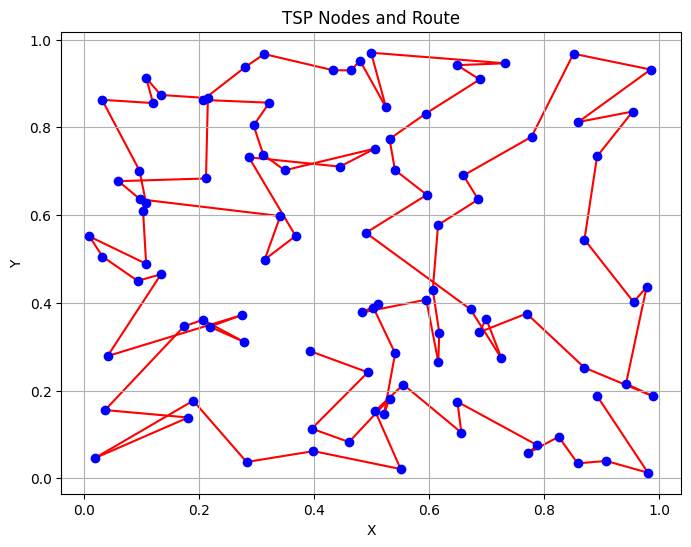

In [31]:
history_rank = []

# Archivo para guardar los resultados
def save_results(generation, best_route, best_distance, file_name="output.txt"):
    with open(file_name, 'a') as file:
        file.write(f"Type: Rank | Generation {generation} | Best distance: {best_distance} | Best route: {best_route}\n")

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations):
    population = create_initial_population(pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]

    for generation in range(generations+1):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            parent1 = rank_selection(population, all_fitness)
            parent2 = rank_selection(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 50 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          history_rank.append([generation, min(all_fitness)])


    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]
    save_results(generation-1, best_route, best_distance)  # Guardar en el archivo


    print(f"Final best distance: {best_distance}")
    return best_route, best_distance

best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
print(best_route)
plot_tsp(cities, best_route)

# **Tournament selection**

In [ ]:
history_tournament = []

# Archivo para guardar los resultados
def save_results(generation, best_route, best_distance, file_name="output.txt"):
    with open(file_name, 'a') as file:
        file.write(f"Type: Tournament | Generation {generation} | Best distance: {best_distance} | Best route: {best_route}\n")

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations):
    population = create_initial_population(pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]

    for generation in range(generations+1):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, all_fitness)
            parent2 = tournament_selection(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 50 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          history_tournament.append([generation, min(all_fitness)])


    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]
    save_results(generation-1, best_route, best_distance)  # Guardar en el archivo

    print(f"Final best distance: {best_distance}")
    return best_route, best_distance


best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
print(best_route)
plot_tsp(cities, best_route)

Generation 0 | Best distance: 46.2302140025595
Generation 50 | Best distance: 25.636228173019372
Generation 100 | Best distance: 19.870477967226446
Generation 150 | Best distance: 16.413750575934895
Generation 200 | Best distance: 14.045488444863434
Generation 250 | Best distance: 13.470352594045087
Generation 300 | Best distance: 12.521854094016243


# **Fitness scaling (Tournament selection)**

In [ ]:
history_fitness_scaling = []

# Archivo para guardar los resultados
def save_results(generation, best_route, best_distance, file_name="output.txt"):
    with open(file_name, 'a') as file:
        file.write(f"Type: Scaling | Generation {generation} | Best distance: {best_distance} | Best route: {best_route}\n")

def tournament_selection_with_scaling(population, fitness_values, k=4):
    # Aplicar fitness scaling para problemas de minimización
    max_fitness = max(fitness_values)
    scaled_fitness = [max_fitness - f for f in fitness_values]  # Invertir fitness

    # Normalizar el fitness escalado
    min_scaled_fitness = min(scaled_fitness)
    normalized_fitness = [
        f - min_scaled_fitness + 1e-6 for f in scaled_fitness
    ]  # Evitar valores cercanos a 0

    # Seleccionar k individuos al azar
    tournament_indices = random.sample(range(len(population)), k)
    tournament_individuals = [population[i] for i in tournament_indices]
    tournament_fitness = [normalized_fitness[i] for i in tournament_indices]

    # Seleccionar el individuo con mejor fitness en el torneo
    best_index = tournament_indices[np.argmax(tournament_fitness)]
    return population[best_index]

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations):
    population = create_initial_population(pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]

    for generation in range(generations+1):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            parent1 = tournament_selection_with_scaling(population, all_fitness)
            parent2 = tournament_selection_with_scaling(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 50 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          history_fitness_scaling.append([generation, min(all_fitness)])


    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]
    save_results(generation-1, best_route, best_distance)  # Guardar en el archivo

    print(f"Final best distance: {best_distance}")
    return best_route, best_distance

best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
print(best_route)
plot_tsp(cities, best_route)

# **Plot Evolución Fitness**

In [ ]:
from matplotlib import pyplot as plt

# Convertir los datos de cada historia a un array de NumPy
data_roulette = np.array(history_roulette)
data_rank = np.array(history_rank)
data_tournament = np.array(history_tournament)
data_tournament_scaling = np.array(history_fitness_scaling)


# Separar las columnas en x (generaciones) e y (fitness) para cada tipo de selección

plt.figure(figsize=(8, 6))

x_roulette = data_roulette[:, 0]
y_roulette = data_roulette[:, 1]

x_rank = data_rank[:, 0]
y_rank = data_rank[:, 1]

x_tournament = data_tournament[:, 0]
y_tournament = data_tournament[:, 1]

x_tournament_scaling = data_tournament[:, 0]
y_tournament_scaling = data_tournament[:, 1]

# Graficar las tres curvas
plt.plot(x_roulette, y_roulette, color='b', linestyle='-', label='Roulette wheel')
plt.plot(x_rank, y_rank, color='g', linestyle='--', label='Rank-based selection')
plt.plot(x_tournament, y_tournament, color='r', linestyle='-.', label='Tournament selection')
plt.plot(x_tournament_scaling, y_tournament_scaling, color='y', linestyle=':', linewidth=2, label='Fitness scaling (Tournament)')

# Etiquetas y título
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Evolución Fitness - Algoritmo Genético')

plt.xticks(ticks=np.arange(0, 2001, 250))  # Espaciado cada 2000 generaciones
plt.yticks(ticks=np.arange(5, 50, 5))      # Espaciado más claro en el eje y

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
